In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import bioframe 
import pandas as pd
import numpy as np 
import os
import json
from io import StringIO
import random

import pysam
import h5py

from Bio import motifs
from Bio import pairwise2
from Bio.Seq import Seq

from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, optimal_leaf_ordering

In [2]:
import sys

sys.path.insert(0, "/home1/smaruj/akita_utils/")

# from akita_utils import *
import akita_utils

2022-07-27 20:29:51.225197: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/pmix-3.1.3-3sm6emyqaxapunh7rwbjvtaqoqe2e5z3/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openmpi-4.0.2-ipm3dnvlbtxawpi4ifz7jma6jgr7mexq/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openblas-0.3.8-2no6mfziiclwxb7lstxoos335gnhjpes/lib:/spack/apps/gcc/8.3.0/lib64::/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2022-07-27 20:29:51.225254: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
seq_list = []

with open("Strong.fasta", "r") as infile:
    for line in infile.readlines():
        if line[0] != ">" and line[0] != "":
            seq_list.append(line.strip())
    

In [4]:
def split_and_encode(seq_list):

    def split(word):
        return [char for char in word]

    bp_dir = {"A":0, "C":1, "T":2, "G":3}

    seq_len = len(seq_list[0].strip())
    num_seq = len(seq_list)

    bp_matrix = np.zeros(shape=(num_seq, seq_len))

    for s in range(num_seq):
        seq = seq_list[s]
        bps_list = split(seq.strip())
        for k in range(seq_len):
            bp_matrix[s, k] = bp_dir[bps_list[k]]
    
    return bp_matrix

In [8]:
def cluster(seq_list):
    
    seq_len = len(seq_list[0].strip())
    num_seq = len(seq_list)
    
    encoded_matrix = split_and_encode(seq_list)
    
    Z = linkage(encoded_matrix, 'ward')
    ordered_Z = optimal_leaf_ordering(Z, encoded_matrix)
    
    fig1, ax = plt.subplots(1,1, figsize=(seq_len//3, num_seq//10))
    fig1 = dendrogram(ordered_Z, get_leaves=True, orientation='left')
    # plt.savefig("Dendrogram.png")
    
    permutation = list(reversed(fig1['leaves']))
    
    return permutation

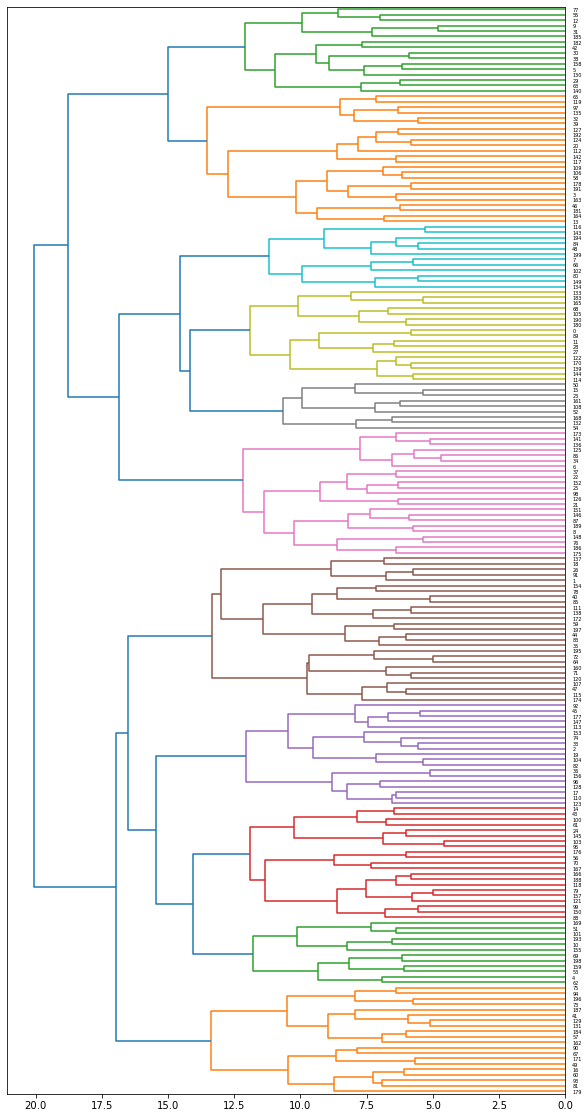

In [9]:
perm = cluster(seq_list)

In [24]:
def matrix_clusterplot(seq_list, permutation):
    
    seq_len = len(seq_list[0].strip())
    num_seq = len(seq_list)
    
    encoded_matrix = split_and_encode(seq_list)
    
    idx = np.zeros(shape=(num_seq, seq_len))
    for i in range(len(permutation)):
        idx[i] = encoded_matrix[permutation[i]]

    fig, ax = plt.subplots(1,1, figsize=(num_seq//2, seq_len//2))

    colors = ["green", "blue", "red", "orange"]
    cmap = ListedColormap(colors)

    img = ax.imshow(idx, cmap=cmap)

    flank_ind = [i for i in range(-1,-(seq_len+1),-1)]
    x_label_list = [flank_ind[len(flank_ind)-1-i] for i in range(len(flank_ind))]

    ax.set_xticks([i for i in range(30)])

    ax.set_xticklabels(x_label_list)
    # plt.savefig("Seq_matrix.png")
    
    plt.show()

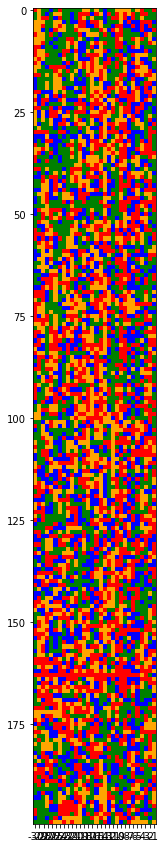

In [25]:
matrix_clusterplot(seq_list, perm)

In [ ]:
# encoded_matrix = split_and_encode(seq_list)

In [ ]:
# from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, optimal_leaf_ordering

# Z = linkage(encoded_matrix, 'ward')
# ordered_Z = optimal_leaf_ordering(Z, encoded_matrix)
# fig = plt.figure(figsize=(10, 30))
# dn = dendrogram(ordered_Z, get_leaves=True, orientation='left')
# plt.savefig('dendrogram.png', bbox_inches='tight', pad_inches=0)

# # leaves are in reversed order, because the orientation is left
# dn_order_first200 = first200.reindex(reversed(dn['leaves']))

In [ ]:
# seq_len = 30
# num_seq = 200

In [ ]:
# permutation = list(reversed(dn['leaves']))
# idx = np.zeros(shape=(num_seq, seq_len))
# for i in range(len(permutation)):
#     idx[i] = encoded_matrix[permutation[i]]
# list(reversed(dn['leaves']))

In [ ]:
# encoded_matrix[permutation[0],:]

In [ ]:
# idx[0]

In [ ]:
# fig, ax = plt.subplots(1,1, figsize=(num_seq//3, seq_len//3))
    
# colors = ["green", "blue", "red", "orange"]
# cmap = ListedColormap(colors)

# img = ax.imshow(idx, cmap=cmap)

# flank_ind = [i for i in range(-1,-(seq_len+1),-1)]
# x_label_list = [flank_ind[len(flank_ind)-1-i] for i in range(len(flank_ind))]

# ax.set_xticks([i for i in range(30)])

# ax.set_xticklabels(x_label_list)

# plt.show()
    

In [ ]:
# def matrix_bp(seq_list):
    
#     def split(word):
#         return [char for char in word]

#     bp_dir = {"A":0, "C":1, "T":2, "G":3}
    
#     seq_len = len(seq_list[0].strip())
#     num_seq = len(seq_list)
    
#     bp_matrix = np.zeros(shape=(num_seq, seq_len))

#     for s in range(num_seq):
#         seq = seq_list[s]
#         bps_list = split(seq.strip())
#         for k in range(seq_len):
#             bp_matrix[s, k] = bp_dir[bps_list[k]]
    
#     fig, ax = plt.subplots(1,1, figsize=(num_seq//3, seq_len//3))
    
#     colors = ["green", "blue", "red", "orange"]
#     cmap = ListedColormap(colors)
    
#     img = ax.imshow(bp_matrix, cmap=cmap)

#     flank_ind = [i for i in range(-1,-(seq_len+1),-1)]
#     x_label_list = [flank_ind[len(flank_ind)-1-i] for i in range(len(flank_ind))]

#     ax.set_xticks([i for i in range(30)])

#     ax.set_xticklabels(x_label_list)
    
#     plt.show()
    

In [ ]:
# matrix_bp(seq_list)

In [26]:
def cumulative_bp_sum(seq_list):
    bp_dir = {"A":0, "C":1, "T":2, "G":3}

    seq_len = len(seq_list[0].strip())

    cumsum_matrix = np.zeros(shape=(4, seq_len))

    for seq in seq_list:
        for nucl_i in range(seq_len):
            cumsum_matrix[bp_dir[seq[nucl_i]], nucl_i] += 1

    return cumsum_matrix

In [27]:
cumulative_bp_sum(seq_list)

array([[ 57.,  56.,  57.,  52.,  55.,  60.,  58.,  66.,  57.,  57.,  45.,
         54.,  45.,  54.,  42.,  30.,  40.,  27.,  61.,  84.,  62.,  37.,
         45.,  36.,  37.,  48.,  61.,  66.,  54.,  61.],
       [ 42.,  42.,  34.,  41.,  49.,  48.,  52.,  45.,  39.,  45.,  45.,
         41.,  43.,  46.,  41.,  49.,  18.,  41.,  58.,  30.,  31.,  21.,
         41.,  82.,  69.,  60.,  56.,  34.,  37.,  37.],
       [ 62.,  53.,  55.,  54.,  56.,  44.,  48.,  50.,  55.,  45.,  60.,
         59.,  61.,  51.,  51.,  73.,  74.,  46.,  53.,  34.,  72., 109.,
         79.,  55.,  69.,  56.,  42.,  65.,  74.,  60.],
       [ 39.,  49.,  54.,  53.,  40.,  48.,  42.,  39.,  49.,  53.,  50.,
         46.,  51.,  49.,  66.,  48.,  68.,  86.,  28.,  52.,  35.,  33.,
         35.,  27.,  25.,  36.,  41.,  35.,  35.,  42.]])

In [ ]:
# def cumulative_bp_sum(seq_list):
    
#     def split(word):
#         return [char for char in word]

#     bp_dir = {"A":0, "C":1, "T":2, "G":3}
    
#     seq_len = len(seq_list[0].strip())

#     cumsum_matrix = np.zeros(shape=(4, seq_len))

#     for seq in seq_list:
#         bps_list = split(seq.strip())
#         for k in range(len(bps_list)):
#             ind = bp_dir[bps_list[k]]
#             cumsum_matrix[ind, k] += 1
    
#     return cumsum_matrix

In [28]:
test = cumulative_bp_sum(seq_list)

In [38]:
def plot_bps_freq(seq_list, size=(20,16)):
    
    seq_len = len(seq_list[0].strip())
    num_seq = len(seq_list)
    
    cumsum_matrix = cumulative_bp_sum(seq_list) / num_seq
    
    fig, ax = plt.subplots(1,1, figsize=size)

    img = ax.imshow(cumsum_matrix, vmin = 0.0, vmax =0.65)

    y_label_list = ["A", "C", "T", "G"]
    
    ind = seq_len+1
    flank_ind = [i for i in range(-1,-ind,-1)]
    x_label_list = [flank_ind[len(flank_ind)-1-i] for i in range(len(flank_ind))]

    # x_label_list = [i for i in range(-1,-30)]

    ax.set_xticks([i for i in range(30)])
    ax.set_yticks([0,1,2,3])

    ax.set_xticklabels(x_label_list)
    ax.set_yticklabels(y_label_list)
    
    fig.colorbar(img, shrink = 0.5)
    # plt.clim(0, 1)
    plt.show()

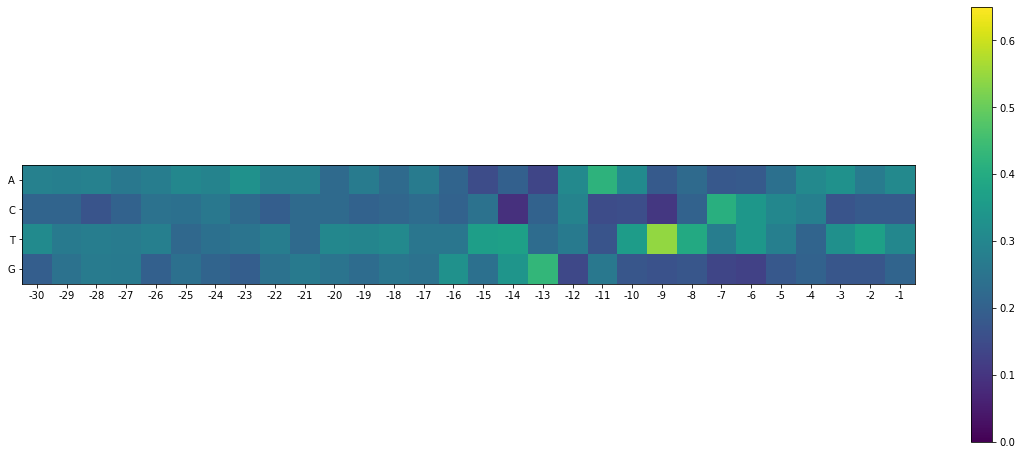

In [35]:
plot_bps_freq(seq_list)

In [31]:
weak_seq_list = []

with open("Weak.fasta", "r") as infile:
    for line in infile.readlines():
        if line[0] != ">" and line[0] != "":
            weak_seq_list.append(line.strip())

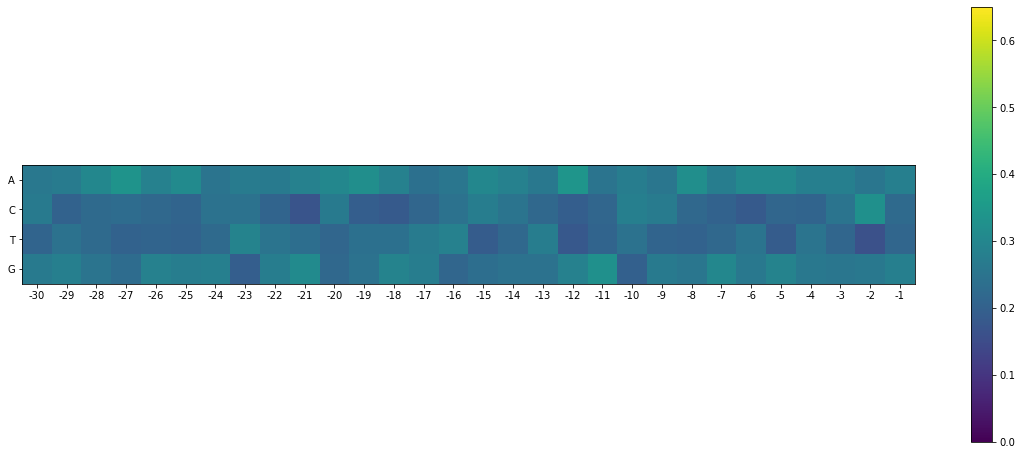

In [37]:
plot_bps_freq(weak_seq_list)

In [33]:
pd_test = pd.DataFrame(np.transpose(test), columns=["A", "C", "G", "T"])

In [ ]:
import logomaker
#https://logomaker.readthedocs.io/en/latest/index.html

In [ ]:
logomaker.Logo(pd_test).draw()

In [ ]:
logomaker.Logo(pd_test).fade_glyphs_in_probability_logo()

In [ ]:
logomaker.Logo(pd_test).style_glyphs_below()